# ðŸ“” AnÃ¡lise  - A segunda etapa da PrÃ© Modelagem

## 1.0 Bibliotecas e Leitura de Dados 

In [44]:
# Bibliotecas utilizadas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
# Lendo dados preprocessados
path = 'Churn_Telecon_Pre_Processado.xls'
df_churn = pd.read_csv(path)
df_churn.head()

ID  Genero  Idoso Casado Dependentes  Tempo_como_Cliente  \
0  7590-VHVEG  Female      0    Yes          No                   1   
1  5575-GNVDE    Male      0     No          No                  34   
2  3668-QPYBK    Male      0     No          No                   2   
3  7795-CFOCW    Male      0     No          No                  45   
4  8191-XWSZG  Female      0     No          No                  52   

  Servico_Telefonico Servico_Internet    Servico_Seguranca  \
0                 No              DSL                   No   
1                Yes              DSL                  Yes   
2                Yes              DSL                  Yes   
3                 No              DSL                  Yes   
4                Yes               No  No internet service   

       Suporte_Tecnico         Streaming_TV   Tipo_Contrato  \
0                   No                   No  Month-to-month   
1                   No                   No        One year   
2                   No                   No  Month-to-month   
3                  Yes                   No        One year   
4  No internet service  No internet service        One year   

            Metodo_Pagamento  Pagamento_Mensal  Total_Pago Churn  
0           Electronic check         29.850000       29.85    No  
1               Mailed check         56.950000     1889.50    No  
2               Mailed check         53.850000      108.15   Yes  
3  Bank transfer (automatic)         65.607563     1840.75    No  
4               Mailed check         65.607563     1022.95    No

## 2.0 AnÃ¡lise Univariada

### 2.1 EstatÃ­sticas BÃ¡sicas
- A partir dessa anÃ¡lise, a variÃ¡vel que mais parece ter os dados pouco equilibrados Ã© a Total_Pago, pois a diferenÃ§a entre a mÃ©dia, o valor mÃ¡ximo e os 50% Ã© bem grande, entÃ£o tende-se a acreditar que o equilÃ­brio dos dados esteja mais elevado para a parte superior, o que Ã© confirmado a partir do grÃ¡fico Boxplot dele.
- Existe tambÃ©m uma discrepÃ¢ncia entre a mÃ©dia e os 50% na variÃ¡vel Tempo_como_Cliente, porÃ©m, apÃ³s gerar um grÃ¡fico de caixa, pode-se observar que essa diferenÃ§a Ã© mÃ­nima, portanto nÃ£o Ã© necessÃ¡rio ver como um problema. 

In [46]:
# Visualizando mÃ©tricas bÃ¡sicas 
df_churn.describe()

Idoso  Tempo_como_Cliente  Pagamento_Mensal   Total_Pago
count  2488.000000         2488.000000       2488.000000  2488.000000
mean      0.161576           32.352090         65.607563  2290.087178
std       0.368135           24.636885         27.984700  2264.585643
min       0.000000            0.000000         18.400000    18.800000
25%       0.000000            8.000000         45.400000   402.337500
50%       0.000000           29.000000         65.607563  1402.900000
75%       0.000000           56.000000         87.712500  3867.162500
max       1.000000           72.000000        118.650000  8564.750000

In [47]:
# Calculando mediana e mÃ©dia da variÃ¡vel Total_Pago
TotalPago_Mediana = df_churn['Total_Pago'].median()
TotalPago_Media = df_churn['Total_Pago'].mean()
print("Mediana Total_Pago: {}\nMÃ©dia Total_Pago: {}".format(TotalPago_Mediana, TotalPago_Media))

Mediana Total_Pago: 1402.9
MÃ©dia Total_Pago: 2290.0871784565916


### 2.2 AnÃ¡lise de VariÃ¡veis NumÃ©ricas

#### 2.2.1 AnÃ¡lise da VariÃ¡vel Total Pago

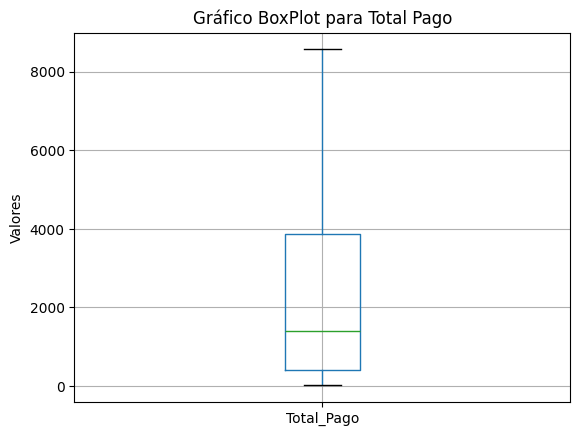

In [48]:
# Criando grÃ¡fico de caixa para a variÃ¡vel Total_Pago
df_churn.boxplot(column='Total_Pago')

# Customizando grÃ¡fico
plt.title("GrÃ¡fico BoxPlot para Total Pago")
plt.ylabel("Valores")

# Exibindo grÃ¡fico
plt.show()

#### 2.2.2 AnÃ¡lise da VariÃ¡vel Tempo como Cliente

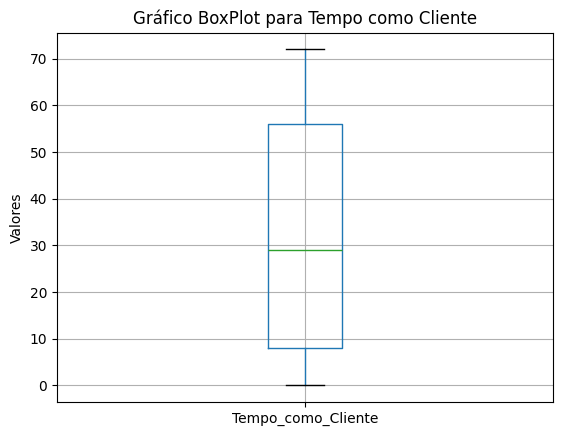

In [49]:
# Criando grÃ¡fico de caixa para a variÃ¡vel Tempo_como_Cliente
df_churn.boxplot(column='Tempo_como_Cliente')

# Customizando grÃ¡fico
plt.title("GrÃ¡fico BoxPlot para Tempo como Cliente")
plt.ylabel("Valores")

# Exibindo grÃ¡fico
plt.show()

### 2.3 AnÃ¡lise de VariÃ¡veis CategÃ³ricas

#### 2.3.1 AnÃ¡lise da VariÃ¡vel GÃªnero
- De acordo com a visualizaÃ§Ã£o, Ã© notÃ¡vel que a clase Ã© bem balanceada entre Feminino e Masculino (51% e 49%, respectivamente).

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\3291752436.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



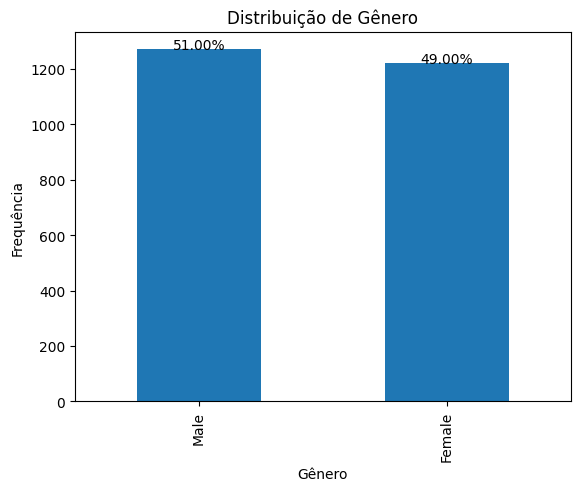

In [50]:
# Calculando quantidade de dados para cada classe e a porcentagem sobre o total
contagem_genero = df_churn['Genero'].value_counts()
porcentagem_genero = (contagem_genero/contagem_genero.sum()) * 100

# Criando grÃ¡fico para genero
genero = contagem_genero.plot(kind='bar')

# Adicionando as porcentagens no grÃ¡fico
for i, v in enumerate(contagem_genero):
    genero.text(i, v + 1, f'{porcentagem_genero[i]:.2f}%', ha='center')

# Estilizando grÃ¡fico
plt.title('DistribuiÃ§Ã£o de GÃªnero')
plt.xlabel('GÃªnero')
plt.ylabel('FrequÃªncia')

# Exibindo grÃ¡fico
plt.show()

#### 2.3.2 AnÃ¡lise da VariÃ¡vel MÃ©todo Pagamento 
- A partir dessa anÃ¡lise, pode-se verificar que a classe 'Eletronic check' (33%) tem uma frequencia maior acerca das demais classes (21-23%), uma diferenÃ§a de mais ou menos 10%. 

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\907836539.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



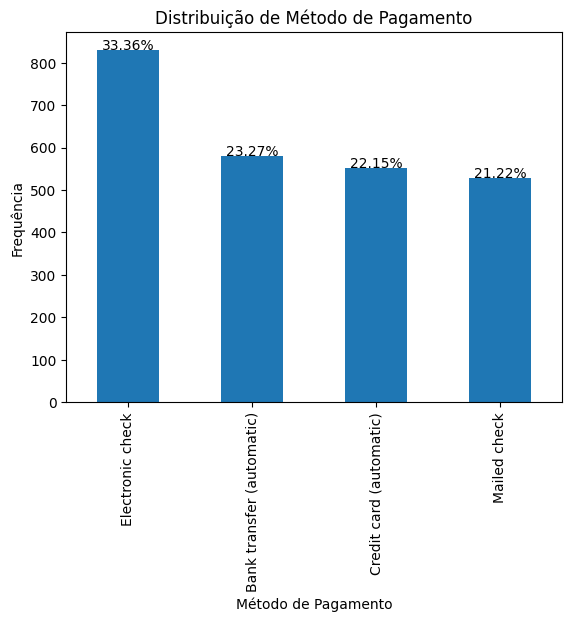

In [51]:
# Calculando contagem e porcentagem da variÃ¡vel MÃ©todo de Pagamento
contagem_metodoP = df_churn['Metodo_Pagamento'].value_counts()
porcentagem_metodoP = (contagem_metodoP/contagem_metodoP.sum()) * 100 

# Criando grÃ¡fico para MÃ©todo de Pagamento
metodo = contagem_metodoP.plot(kind='bar')

# Adicionando porcentagens no grÃ¡fico
for i, v in enumerate(contagem_metodoP):
    metodo.text(i, v + 1, f'{porcentagem_metodoP[i]:.2f}%', ha='center')

# Customizando grÃ¡fico
plt.title('DistribuiÃ§Ã£o de MÃ©todo de Pagamento')
plt.xlabel('MÃ©todo de Pagamento')
plt.ylabel('FrequÃªncia')

# Exibindo grÃ¡fico
plt.show()

#### 2.3.3 AnÃ¡lise da VariÃ¡vel Churn
- De acordo com a anÃ¡lise do grÃ¡fico da DistribuiÃ§Ã£o da Classe Churn, pode-se verificar que existe uma Classe MajoritÃ¡ria em No (74%), como uma diferenÃ§a de quase 50% entre a classe Yes (26%).

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\1181910699.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



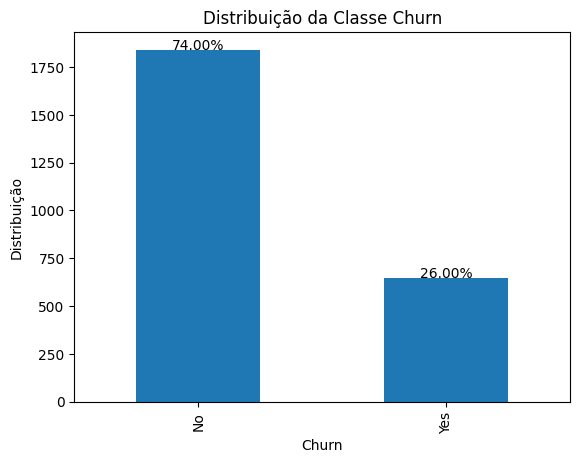

In [52]:
# Calculando contagem e porcentagem da variÃ¡vel Churn
contagem_churn = df_churn['Churn'].value_counts()
porcentagem_churn = (contagem_churn/contagem_churn.sum()) * 100

# Criando grÃ¡fico
churn = contagem_churn.plot(kind='bar')

# Aplicando porcentagens ao grÃ¡fico
for i, v in enumerate(contagem_churn):
    churn.text(i, v + 1, f'{porcentagem_churn[i]:.2f}%', ha='center')

# Customizando grÃ¡fic
plt.title('DistribuiÃ§Ã£o da Classe Churn')
plt.ylabel('DistribuiÃ§Ã£o')

# Exibindo grÃ¡fico
plt.show()

#### 2.3.4 AnÃ¡lise da VariÃ¡vel Tipo Contrato
- A partir dessa anÃ¡lise, pode-se verificar que a classe 'Month-to-month' tem uma frequencia maior (55%) acerca das demais classes (20-24%), uma diferenÃ§a de mais ou menos 30%. Portanto existe uma classe majoritÃ¡ria em 'Month-to-month'.

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\2147381671.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



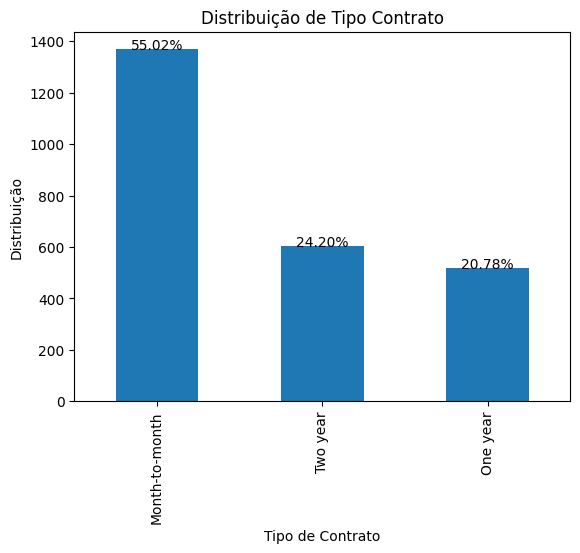

In [53]:
# Calculando contagem e porcentagem da variÃ¡vel Tipo_Contrato
contagem_Tipo_Contrato = df_churn['Tipo_Contrato'].value_counts()
porcentagem_Tipo_Contrato = (contagem_Tipo_Contrato/contagem_Tipo_Contrato.sum()) * 100

# Criando grÃ¡fico
Tipo_Contrato = contagem_Tipo_Contrato.plot(kind='bar')

# Aplicando porcentagens ao grÃ¡fico
for i, v in enumerate(contagem_Tipo_Contrato):
    Tipo_Contrato.text(i, v + 1, f'{porcentagem_Tipo_Contrato[i]:.2f}%', ha='center')

# Customizando grÃ¡fic
plt.title('DistribuiÃ§Ã£o de Tipo Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('DistribuiÃ§Ã£o')

# Exibindo grÃ¡fico
plt.show()

#### 2.3.5 AnÃ¡lise da VariÃ¡vel Streaming TV
- A partir da anÃ¡lise do grÃ¡fico, Ã© possÃ­vel destacar as classe "No" e "Yes" com maior quantidade de dados (40% e 38%, respectivamente), tendo uma diferenÃ§a de 2% entre elas, enquanto a classe "No internet service" tem uma porcentagem bem abaixo das demais, com mais ou menos 10% de diferenÃ§a (21%). 

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\3995847066.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



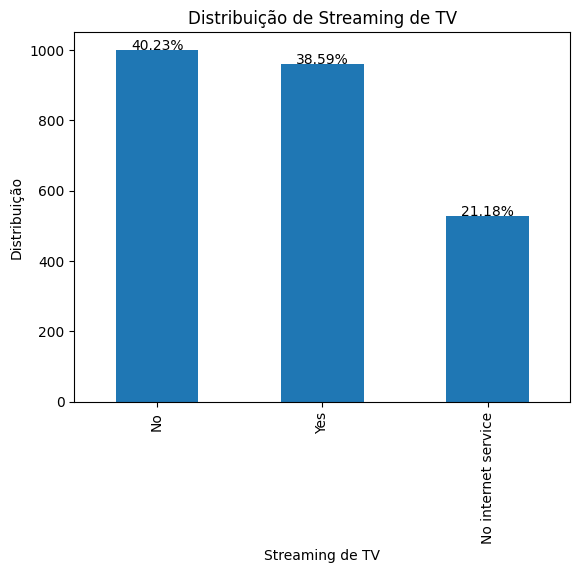

In [54]:
# Calculando contagem e porcentagem da variÃ¡vel Streaming_TV
contagem_Streaming_TV = df_churn['Streaming_TV'].value_counts()
porcentagem_Streaming_TV = (contagem_Streaming_TV/contagem_Streaming_TV.sum()) * 100

# Criando grÃ¡fico
Streaming_TV = contagem_Streaming_TV.plot(kind='bar')

# Aplicando porcentagens ao grÃ¡fico
for i, v in enumerate(contagem_Streaming_TV):
    Streaming_TV.text(i, v + 1, f'{porcentagem_Streaming_TV[i]:.2f}%', ha='center')

# Customizando grÃ¡fic
plt.title('DistribuiÃ§Ã£o de Streaming de TV')
plt.xlabel('Streaming de TV')
plt.ylabel('DistribuiÃ§Ã£o')

# Exibindo grÃ¡fico
plt.show()

### 2.4 AnÃ¡lise de VariÃ¡veis Booleanas

#### 2.4.1 AnÃ¡lise da VariÃ¡vel Casado
- A anÃ¡lise mostra que essa variÃ¡vel estÃ¡ bem equilibrada entre casados (49%) e nÃ£o casados (51%). 

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\75655449.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



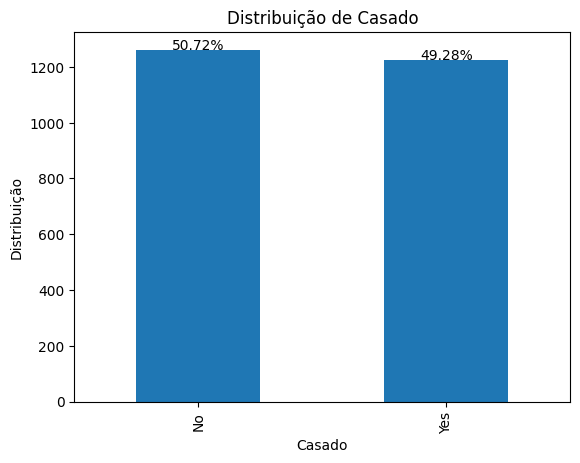

In [55]:
# Calculando contagem e porcentagem da variÃ¡vel Casado
contagem_Casado = df_churn['Casado'].value_counts()
porcentagem_Casado = (contagem_Casado/contagem_Casado.sum()) * 100

# Criando grÃ¡fico
Casado = contagem_Casado.plot(kind='bar')

# Aplicando porcentagens ao grÃ¡fico
for i, v in enumerate(contagem_Casado):
    Casado.text(i, v + 1, f'{porcentagem_Casado[i]:.2f}%', ha='center')

# Customizando grÃ¡fic
plt.title('DistribuiÃ§Ã£o de Casado')
plt.xlabel('Casado')
plt.ylabel('DistribuiÃ§Ã£o')

# Exibindo grÃ¡fico
plt.show()

#### 2.4.2 AnÃ¡lise da VariÃ¡vel Dependentes
- A anÃ¡lise mostra que o nÃºmero de dependentes (31%) Ã© bem menor do que aqueles que nÃ£o possuem dependentes (68%), uma diferenÃ§a de mais ou menos 37%. Portanto existe uma classe majoritÃ¡ria em "No".

C:\Users\mille\AppData\Local\Temp\ipykernel_2916\2564064421.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



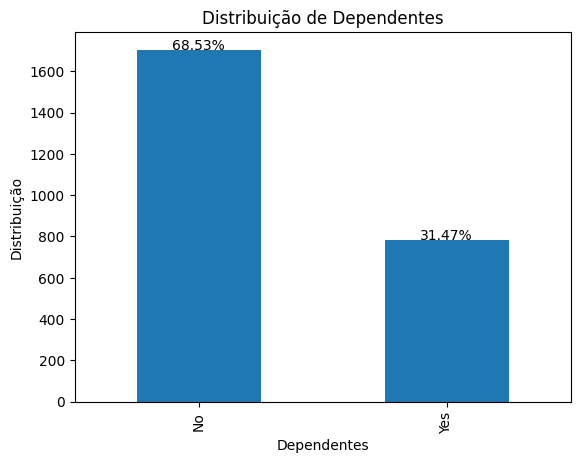

In [56]:
# Calculando contagem e porcentagem da variÃ¡vel Dependentes
contagem_Dependentes = df_churn['Dependentes'].value_counts()
porcentagem_Dependentes = (contagem_Dependentes/contagem_Dependentes.sum()) * 100

# Criando grÃ¡fico
Dependentes = contagem_Dependentes.plot(kind='bar')

# Aplicando porcentagens ao grÃ¡fico
for i, v in enumerate(contagem_Dependentes):
    Dependentes.text(i, v + 1, f'{porcentagem_Dependentes[i]:.2f}%', ha='center')

# Customizando grÃ¡fic
plt.title('DistribuiÃ§Ã£o de Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('DistribuiÃ§Ã£o')

# Exibindo grÃ¡fico
plt.show()

#### 2.4.3 AnÃ¡lise da VariÃ¡vel Idoso
- Como essa variÃ¡vel Ã© do tipo Booleano, o describe dela nÃ£o Ã© fiel ao equilÃ­brio real das classes, por isso Ã© interessante criar um grÃ¡fico de barras para verificar essa distribuiÃ§Ã£o.
- A partir do grÃ¡fico, pode-se verificar que existem poucos idosos na base de dados, ou seja, sua maioria nÃ£o Ã© idoso. 
- Nesse caso, Ã© classificado a variÃ¡vel Idoso como Classe MajoritÃ¡ria (0).

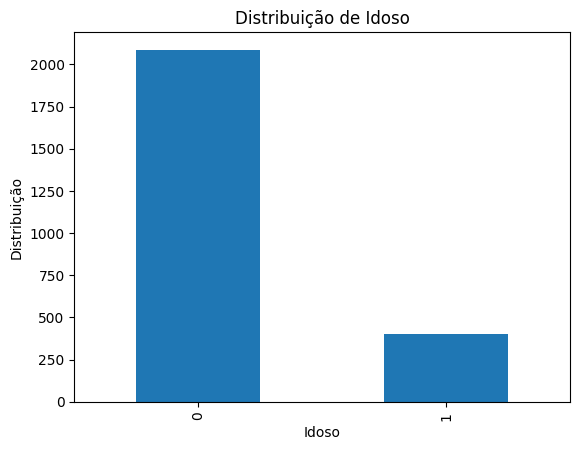

In [57]:
# Contando quantidade de dados da variÃ¡vel Idoso para cada classe
contagem_idoso = df_churn['Idoso'].value_counts()

# Calculando porcentagem de Idoso para cada classe 
porcentagem_idoso = (contagem_idoso/contagem_idoso.sum()) * 100 

# Criando grÃ¡fico de barras 
ax = contagem_idoso.plot(kind='bar')

# Customizando grÃ¡fico
plt.title('DistribuiÃ§Ã£o de Idoso')
plt.xlabel('Idoso')
plt.ylabel('DistribuiÃ§Ã£o')

# Exibindo grÃ¡fico
plt.show()

## 3.0 Tratamento de Outliers
- A Ãºnica variÃ¡vel identificada com uma leve oscilaÃ§Ã£o na distribuiÃ§Ã£o dos dados foi Total_Pago, porÃ©m, de acordo com a anÃ¡lise anterior, os dados parecem condizer com o esperado, mesmo que alguns registros estejam maiores que a mÃ©dia, Ã© possÃ­vel que eles estejam corretos. Dessa forma, o tratamento de Outlier nÃ£o serÃ¡ necessÃ¡rio. 

## 4.0 AnÃ¡lise Bivariada
- MÃ©tricas:
    - Mulheres estÃ£o mais propensas a Churn que homens? (Classe (Churn) â†’ GÃªnero);
    - SerÃ¡ que idosos sÃ£o mais propensos a Churn? (Classe (Churn) â†’ Idoso );
    - SerÃ¡ que o tempo como cliente influencia se ele vai se tornar Churn? (Classe (Churn) â†’ Tempo_como_Cliente);
    - Quanto o cliente pagou de acordo com o seu tipo de contrato? E isso pode influenciar em ele se tornar Churn? (Classe (Churn) â†’ Tipo_Contrato e Total_Pago);
    - Qual serÃ¡ o mÃ©todo de pagamento mais utilizado pelos clientes Churn? (Classe (Churn) â†’ Metodo_Pagamento)


### 4.1 RelaÃ§Ã£o entre GÃªnero e Classe (Churn)
- A partir dessa anÃ¡lise, Ã© bastante notÃ¡vel que o gÃªnero nÃ£o tem influÃªncia direta se o cliente Ã© ou nÃ£o Churn, pois Ã© praticamente dividido igualmente a quantidade de clientes Churn que sÃ£o mulheres e homens. 

In [58]:
# CriaÃ§Ã£o de grÃ¡fico do tipo histograma com barras empilhadas
fig_Genero = px.histogram(df_churn, x='Churn', color='Genero', barmode='stack')

# ConfiguraÃ§Ãµes de layout
fig_Genero.update_layout(
    title='RelaÃ§Ã£o entre GÃªnero e Churn',
    xaxis_title='Churn',
    yaxis_title='GÃªnero',
    legend_title='GÃªnero'
)

# Exibindo grÃ¡fico
fig_Genero.show()

In [59]:
# Criando grÃ¡fico com porcentagem por categoria
df_grouped_Genero = df_churn.groupby(['Churn','Genero']).size().reset_index(name='count')

# Ajustando labels
df_grouped_Genero['Churn'] = df_grouped_Genero['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})
df_grouped_Genero['Genero'] = df_grouped_Genero['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

# Criando porcentagem para o agrupamento
total_por_churn = df_grouped_Genero.groupby('Churn')['count'].transform('sum')
df_grouped_Genero['percent'] = round((df_grouped_Genero['count'] / total_por_churn) *100, 2) # Cria variÃ¡vel com a porcentagem no df_grouped

# Criando grÃ¡fico de barras empilhadas
fig = px.bar(df_grouped_Genero, x='Churn', y='percent', color='Genero', barmode='stack',
							labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Genero': 'GÃªnero'})
							
# Customizando grÃ¡fico
fig.update_layout(title='RelaÃ§Ã£o entre GÃªnero e Classe (Churn)',
									yaxis_title='Porcentagem',
									legend_title='GÃªnero')

# Exibindo grÃ¡fico
fig.show()

### 4.2 RelaÃ§Ã£o entre Idoso e Classe (Churn)
- De acordo com a anÃ¡lise dos grÃ¡ficos, pode-se entender que quando o cliente Ã© Churn, existe uma porcentagem deles que sÃ£o idosos tambÃ©m. NÃ£o Ã© uma porcentagem gritante, mas existe uma parte de clientes idosos que sÃ£o Churn (diferenÃ§a de 76% de nÃ£o idosos para 24% que sÃ£o idosos). Em contrapartidam, existem mais clientes nÃ£o Churn que nÃ£o sÃ£o idosos, do que os que sÃ£o idosos (diferenÃ§a de 87% para nÃ£o idosos e 13% que sÃ£o idosos). 

In [60]:
# Criando agrupamento para Churn e Idoso com a quantidade de ocorrÃªncias
df_grouped_idoso = df_churn.groupby(['Churn', 'Idoso']).size().reset_index(name='count')

# Ajustando labels de Idoso
map_idoso = {
    1: 'Sim',
    0: 'NÃ£o'
}
df_grouped_idoso['Churn'] = df_grouped_idoso['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})
df_grouped_idoso['Idoso'] = df_grouped_idoso['Idoso'].replace(map_idoso) 

# Criando porcentagem a partir do agrupamento 
total_idoso = df_grouped_idoso.groupby('Churn')['count'].transform('sum')
df_grouped_idoso['percent'] = round((df_grouped_idoso['count'] / total_idoso) * 100, 2)

# Criando grÃ¡fico de barras empilhadas
fig_idoso = px.bar(
    df_grouped_idoso,
    x='Churn',
    y='percent',
    color='Idoso',
    barmode='stack',
    labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Idoso': 'Idoso'}
)

# Customizando grÃ¡fico
fig_idoso.update_layout(
    title='RelaÃ§Ã£o entre Idoso e Classe (Churn)',
    xaxis_title='Churn',
    yaxis_title='Porcentagem'
)

# Exibindo grÃ¡fico
fig_idoso.show()


In [61]:
# Agrupamento
df_grouped_idoso = df_churn.groupby(['Churn', 'Idoso']).size().reset_index(name='count')

# Ajustando labels
df_grouped_idoso['Idoso'] = df_grouped_idoso['Idoso'].replace({1: 'Sim', 0: 'NÃ£o'})
df_grouped_idoso['Churn'] = df_grouped_idoso['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})

# Criando porcentagem dentro de cada grupo de Churn
total_idoso = df_grouped_idoso.groupby('Churn')['count'].transform('sum')
df_grouped_idoso['percent'] = round((df_grouped_idoso['count'] / total_idoso) * 100, 2)

# Adicionando personalizaÃ§Ã£o de cores
cores = ['#1f77b4', '#ff7f0e']

# Criando grÃ¡fico de pizza com facetas (um por valor de Churn)
fig_idoso = px.pie(
    df_grouped_idoso,
    names='Idoso',
    values='count',
    facet_col='Churn',
    color_discrete_sequence=cores
)

# Adicionando tÃ­tulo principal
fig_idoso.update_layout(
    title_text='DistribuiÃ§Ã£o de Idosos por Classe (Churn)',
    title_x=0.5,
    legend_title_text='Idoso'
)

# Personalizando os subtÃ­tulos de cada faceta
fig_idoso.layout.annotations[0].text = "Churn: NÃ£o"
fig_idoso.layout.annotations[1].text = "Churn: Sim"

# Mostrando rÃ³tulos e porcentagens
fig_idoso.update_traces(textinfo='percent+label')

# Exibindo grÃ¡fico
fig_idoso.show()

### 4.3 RelaÃ§Ã£o entre Tempo como Cliente e Classe (Churn) 
- A partir dessa anÃ¡lise, Ã© possÃ­vel notar que o tempo como cliente influencia se ele vai ser Churn ou nÃ£o. Para os que nÃ£o sÃ£o Churn, os dados de Tempo sÃ£o muito bem distribuÃ­dos, porÃ©m para aqueles que sÃ£o Churn, Ã© possÃ­vel notar que os dados se concentram muito nos primeiros meses como cliente (entre 1 a 18 meses, mais ou menos). 

In [62]:
# Garantindo que os valores de Churn estejam como texto legÃ­vel
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})

# GrÃ¡fico violin com melhorias
fig_tempo = px.violin(
    df_churn,
    x='Churn',
    y='Tempo_como_Cliente',
    color='Churn',
    box=True,                # Adiciona o boxplot dentro do violino
    points='all',            # Mostra todos os pontos individuais
    hover_data=df_churn.columns,
    color_discrete_map={
        'Sim': '#d62728',    # Vermelho para churn
        'NÃ£o': '#2ca02c'     # Verde para retenÃ§Ã£o
    },
    title='DistribuiÃ§Ã£o do Tempo como Cliente (Meses) por Classe (Churn)'
)

# Ajustes de layout
fig_tempo.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_title='Churn',
    yaxis_title='Tempo em Meses',
    legend_title_text='Cliente Deu Churn?',
    violingap=0.3,
    violingroupgap=0.2
)

# Exibir grÃ¡fico
fig_tempo.show()

### 4.4 RelaÃ§Ã£o entre Tipo de Contrato, Total Pago ou Pagamento Mensal e Classe (Churn)
- A partir dessas anÃ¡lises, Ã© possÃ­vel notar que no contrato MÃªs a MÃªs, o impacto nÃ£o Ã© tÃ£o grande, mesmo que haja uma leve oscilaÃ§Ã£o no pagamento para aqueles que sÃ£o Churn, o equilÃ­brio entre os dados Ã© notÃ¡vel. A partir do contrato de Um ano, jÃ¡ Ã© possÃ­vel verificar que os dados diminuiram e estÃ¡ bem mais concentrado nos R$5000 total e R$100 mensais. No contrato de Dois anos, os dados diminuiem ainda mais e a concentraÃ§Ã£o aumenta tambÃ©m nos valores mais altos (mais ou menos R$7000 totais e R$110 reais mensais). 
- Isso pode significar que, alÃ©m do tempo (que Ã© verificado na mÃ©trica anterior, realmente influenciar se o cliente vai ser Churn ou nÃ£o), mas tambÃ©m, os clientes que sÃ£o Churn e assinaram um contrato mais longo, em mÃ©dia, tiveram um valor monetÃ¡rio pago maior que os que nÃ£o viraram Churn.

In [63]:
# Ajuste de labels
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})
df_churn['Tipo_Contrato'] = df_churn['Tipo_Contrato'].replace({'Month-to-month': 'MÃªs a MÃªs', 'One year': 'Um ano', 'Two year': 'Dois anos'})

fig_contrato_churn = px.box(
    df_churn,
    x='Tipo_Contrato',
    y='Total_Pago',
    color='Churn',  # separa por Churn (cores diferentes)
    points='all',
    title='DistribuiÃ§Ã£o do Total Pago por Tipo de Contrato e Classe (Churn)',
    color_discrete_map={
        'Sim': '#d62728',  # churn - vermelho
        'NÃ£o': '#2ca02c'   # nÃ£o churn - verde
    }
)

fig_contrato_churn.update_layout(
    title_x=0.5,
    xaxis_title='Tipo de Contrato',
    yaxis_title='Total Pago (R$)',
    legend_title_text='Cliente Deu Churn?'
)

fig_contrato_churn.show()


In [64]:
# Ajuste de labels
df_churn['Churn'] = df_churn['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})

fig_contrato_churn_mensal = px.box(
    df_churn,
    x='Tipo_Contrato',
    y='Pagamento_Mensal',
    color='Churn',  # separa por Churn (cores diferentes)
    points='all',
    title='DistribuiÃ§Ã£o do Pagamento Mensal por Tipo de Contrato e Classe (Churn)',
    color_discrete_map={
        'Sim': '#d62728',  # churn - vermelho
        'NÃ£o': '#2ca02c'   # nÃ£o churn - verde
    }
)

fig_contrato_churn_mensal.update_layout(
    title_x=0.5,
    xaxis_title='Tipo de Contrato',
    yaxis_title='Pagamento Mensal (R$)',
    legend_title_text='Cliente Deu Churn?'
)

fig_contrato_churn_mensal.show()


### 4.5 RelaÃ§Ã£o entre MÃ©todo de Pagamento e Classe (Churn)
- A partir dessa anÃ¡lise, Ã© possÃ­vel verificar que quando um cliente nÃ£o Ã© Churn, seu mÃ©todo de pagamento Ã© bem equilibrado, nÃ£o tendo muitas alteraÃ§Ãµes, porÃ©m quando o cliente Ã© Churn, Ã© possÃ­vel notar que existem bem mais clientes que utilizam o Cheque EletrÃ´nico que os demais mÃ©todos de pagamento (representando 58% dos dados).

In [65]:
# Criando grÃ¡fico com porcentagem por categoria
df_grouped_pag = df_churn.groupby(['Churn','Metodo_Pagamento']).size().reset_index(name='count')

# Ajustando labels
df_grouped_pag['Churn'] = df_grouped_pag['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})
df_grouped_pag['Metodo_Pagamento'] = df_grouped_pag['Metodo_Pagamento'].replace({
    'Bank transfer (automatic)': 'Banco (TransferÃªncia AutomÃ¡tica)',
    'Credit card (automatic)': 'CartÃ£o de CrÃ©dito (TransferÃªncia AutomÃ¡tica)',
    'Electronic check': 'Cheque EletrÃ´nico',
    'Mailed check': 'Cheque Enviado'
    })

# Criando porcentagem para o agrupamento
total_por_pag = df_grouped_pag.groupby('Churn')['count'].transform('sum')
df_grouped_pag['percent'] = round((df_grouped_pag['count'] / total_por_pag) *100, 2) # Cria variÃ¡vel com a porcentagem no df_grouped

# Criando grÃ¡fico de barras empilhadas
fig = px.bar(df_grouped_pag, x='Churn', y='percent', color='Metodo_Pagamento', barmode='group',
							labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Metodo_Pagamento': 'MÃ©todo de Pagamento'})
							
# Customizando grÃ¡fico
fig.update_layout(title='RelaÃ§Ã£o entre MÃ©todo de Pagamento e Classe (Churn)',
									yaxis_title='Porcentagem',
									legend_title='MÃ©todo de Pagamento',
                                    title_x=0.5)

# Exibindo grÃ¡fico
fig.show()

### 4.6 RelaÃ§Ã£o entre Casado e Classe (Churn)
- A partir da anÃ¡lise dos grÃ¡ficos, Ã© notÃ¡vel que maioria dos clientes Churn nÃ£o sÃ£o casados, enquanto que mais da metade dos clientes que nÃ£o sÃ£o Churn, sÃ£o casados. 

In [66]:
# Agrupamento
df_grouped_casado = df_churn.groupby(['Churn', 'Casado']).size().reset_index(name='count')

# Ajustando labels
df_grouped_casado['Casado'] = df_grouped_casado['Casado'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})
df_grouped_casado['Churn'] = df_grouped_casado['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})

# Criando porcentagem dentro de cada grupo de Churn
total_Casado = df_grouped_casado.groupby('Churn')['count'].transform('sum')
df_grouped_casado['percent'] = round((df_grouped_casado['count'] / total_Casado) * 100, 2)

# Adicionando personalizaÃ§Ã£o de cores
cores = ['#d43d57', '#483d8b']

# Criando grÃ¡fico de pizza com facetas (um por valor de Churn)
fig_Casado = px.pie(
    df_grouped_casado,
    names='Casado',
    values='count',
    facet_col='Churn',
    color_discrete_sequence=cores
)

# Adicionando tÃ­tulo principal
fig_Casado.update_layout(
    title_text='DistribuiÃ§Ã£o de Casados por Classe (Churn)',
    title_x=0.5,
    legend_title_text='Casado'
)

# Personalizando os subtÃ­tulos de cada faceta
fig_Casado.layout.annotations[0].text = "Churn: NÃ£o"
fig_Casado.layout.annotations[1].text = "Churn: Sim"

# Mostrando rÃ³tulos e porcentagens
fig_Casado.update_traces(textinfo='percent+label')

# Exibindo grÃ¡fico
fig_Casado.show()

### 4.7 RelaÃ§Ã£o entre ServiÃ§o de Internet e Classe (Churn)
- A partir da anÃ¡lise realizada, Ã© possÃ­vel observar que o ServiÃ§o de Internet mais utilizado por clientes Churn Ã© o de Fibra Ã“tica, enquanto para clientes nÃ£o Churn, os dados se mantevem bem equilibrados. 

In [67]:
# Criando grÃ¡fico com porcentagem por categoria
df_grouped_Servico_Internet = df_churn.groupby(['Churn','Servico_Internet']).size().reset_index(name='count')

# Ajustando labels
df_grouped_Servico_Internet['Churn'] = df_grouped_Servico_Internet['Churn'].replace({'Yes': 'Sim', 'No': 'NÃ£o'})
df_grouped_Servico_Internet['Servico_Internet'] = df_grouped_Servico_Internet['Servico_Internet'].replace({
	'DSL': 'DSL',
	'No': 'NÃ£o Solicitou',
	'Fiber optic': 'Fibra Ã“tica',
	'dsl': 'DSL'
})

# Criando porcentagem para o agrupamento
total_por_Servico_Internet = df_grouped_Servico_Internet.groupby('Churn')['count'].transform('sum')
df_grouped_Servico_Internet['percent'] = round((df_grouped_Servico_Internet['count'] / total_por_Servico_Internet) *100, 2) # Cria variÃ¡vel com a porcentagem no df_grouped

# Criando grÃ¡fico de barras empilhadas
fig_Servico_Internet = px.bar(df_grouped_Servico_Internet, x='Churn', y='percent', color='Servico_Internet', barmode='group',
							labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Servico_Internet': 'Servico de Internet'})
							
# Customizando grÃ¡fico
fig_Servico_Internet.update_layout(title='RelaÃ§Ã£o entre ServiÃ§o de Internet e Classe (Churn)',
									yaxis_title='Porcentagem',
									legend_title='ServiÃ§o de Internet',
                                    title_x=0.5)

# Exibindo grÃ¡fico
fig_Servico_Internet.show()

## 5.0 ConclusÃ£o

### 5.1 AnÃ¡lise Univariada
- **EstatÃ­sticas BÃ¡sicas**: Nessa anÃ¡lise, podemos ver que a variÃ¡vel **Total_Pago** Ã© a que possui maior variaÃ§Ã£o de dados, pois a sua mÃ©dia era muito discrepante do valor mÃ¡ximo, porÃ©m ainda estava dentro do esperado e, por isso, nÃ£o senti necessidade de fazer algum tratamento. 
- **VariÃ¡veis CategÃ³ricas**: 
    - GÃªnero: Existe um equilÃ­brio grande; 
    - MÃ©todo de Pagamento: A classe que se sobressai Ã© a de Cheque EletrÃ´nico;
    - Churn (Classe): Existem muito mais clientes NÃ£o Churn do que Churn;
    - Tipo de Contrato: O contrato que maior se sobressai entre os clientes Ã© o MÃªs a MÃªs;
    - Streaming de TV: Existe um certo equilÃ­brio entre clientes que solicitaram ou nÃ£o um serviÃ§o de Streaming para TV, enquanto existe uma baixa grande em clientes que nÃ£o possuem serviÃ§o de internet. 
- **VariÃ¡veis Booleanas**: 
    - Casado: Possui bastante equilÃ­brio nessa variÃ¡vel;
    - Dependentes: Existem muito mais clientes que nÃ£o possuem dependentes; 
    - Idoso: Existem muito mais clientes que nÃ£o sÃ£o idosos; 

### 5.2 AnÃ¡lise Bivariada
- **RelaÃ§Ã£o entre GÃªnero e Churn**: Essa relaÃ§Ã£o Ã© bem fraca, onde podemos notar que existe um equilÃ­brio bem grande entre os gÃªneros que sÃ£o ou nÃ£o Churn;
- **RelaÃ§Ã£o entre Idoso e Churn**: Ã‰ notÃ¡vel que quando o cliente Ã© Churn, existe uma porcentagem deles que sÃ£o idosos tambÃ©m, mas Ã© uma porcentagem sutil; 
- **RelaÃ§Ã£o entre Tempo como Cliente e Churn**: Essas variÃ¡veis possuem uma relaÃ§Ã£o muito forte, onde podemos notar que quanto menor o tempo como cliente, mais propenso ele Ã© de ser Churn;
- **RelaÃ§Ã£o entre Tipo de Contrato, Total Pago e Churn**: Pode-se notar que, para clientes Churn, a partir do tipo de contrato de 1 ano, os clientes possuem um total pago maior e a quantidade de clientes diminui tambÃ©m.
- **RelaÃ§Ã£o entre MÃ©todo de Pagamento e Churn**: O mÃ©todo de pagamento mais utilizado quando se Ã© Churn Ã© o Cheque EletrÃ´nico;
- **RelaÃ§Ã£o entre Casado e Churn**: Ã‰ notÃ¡vel que maioria dos clientes Churn nÃ£o sÃ£o casados, enquanto que mais da metade dos clientes que nÃ£o sÃ£o Churn, sÃ£o casados;
- **RelaÃ§Ã£o entre Servico de Internet e Churn**: O ServiÃ§o de Internet mais utilizado por clientes Churn Ã© o de Fibra Otica.

### 5.3 VariÃ¡veis com Maior Impacto sobre a Classe (Churn)
- De acordo com as anÃ¡lises realizadas anteriormente, as classes que possuem maior impacto sobre o cliente ser ou nÃ£o Churn Ã©, principalmente, o Tempo_como_Cliente, Tipo_Contrato e Total_Pago, pois Ã© notÃ¡vel que o tempo como cliente influencia muito se ele vai se tornar Churn, principalmente nos primeiros meses como cliente, e por causa disso, o tipo de contrato de MÃªs a MÃªs precisa conter algum elemento que estimule o cliente a continuar, trazendo formas de desconto para que o seu total pago nÃ£o seja tÃ£o elevado. 
- Outra variÃ¡vel que possui uma quantidade muito grande de clientes Churn Ã© os que utilizaram Fibra Ã“tica no seu ServiÃ§o de Internet. Ã‰ importante investigar se esse elemento estÃ¡ afetando o motivo do cliente se tornar Churn ou nÃ£o. Isso tambÃ©m Ã© notado em clientes que utilizaram o Cheque EletrÃ´nico como MÃ©todo de Pagamento, Ã© uma quantidade muito discrepante entre os clientes que sÃ£o Churn e, por isso, Ã© importante verificar esse elemento.